In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
from matplotlib import pyplot as plt
import numpy as np

from pyqumo.fitting.johnson89 import fit_mern2

In [96]:
def get_c(m1, m2):
    std = (m2 - m1**2)**0.5
    return std / m1

def get_skew(m1, m2, m3):
    var = m2 - m1**2
    std = var**0.5
    return (m3 - 3*m1*var - m1**3) / (var * std)

def get_c_min_1c(m1, m2):
    c = get_c(m1, m2)
    return c - 1/c

2.0

In [28]:
def get_m2(m1, cm1c):
    """
    Get M2 value from `c - 1/c` (cm1c) and M1 values.
    """
    c = (cm1c + (cm1c**2 + 4)**0.5) / 2
    return (c**2 + 1) * m1**2

def get_m3(m1, cm1c, gamma):
    """
    Get M3 value from `c - 1/c`, M1 and skewness (\gamma) values.
    """
    c = (cm1c + (cm1c**2 + 4)**0.5) / 2
    m2 = get_m2(m1, c)
    std = c * m1
    var = std**2
    return gamma * var * std + 3 * m1 * var + m1**3

In [45]:
M1 = 1
CM1C_GRID = np.linspace(-5, 5, 100)
GAMMA_GRID = np.linspace(-5, 5, 100)
M2_GRID = np.linspace(M1, 5, 10000)

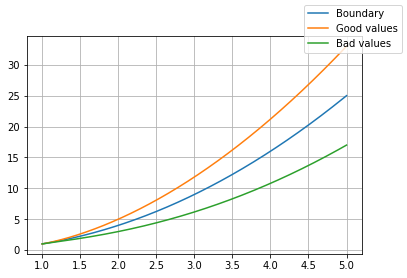

In [46]:
cs = [get_c_min_1c(M1, m2) for m2 in M2_GRID]
oy0 = [get_m3(M1, c_, c_) for c_ in cs]
oyG = [get_m3(M1, c_, c_ + 1) for c_ in cs]
oyB = [get_m3(M1, c_, c_ - 1) for c_ in cs]
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(M2_GRID, oy0, label="Boundary")
ax.plot(M2_GRID, oyG, label="Good values")
ax.plot(M2_GRID, oyB, label="Bad values")
plt.grid()
fig.legend()

In [95]:
C = 0.9
G = -0.01

m2 = get_m2(M1, C - 1/C)
m3 = get_m3(M1, C - 1/C, G)
ph, _ = fit_mern2([M1, m2, m3])

print(f'Original: m1 = {M1}, m2 = {m2}, m3 = {m3}')
print(f'Fitted  : m1 = {ph.mean}, m2 = {ph.moment(2)}, m3 = {ph.moment(3)}')
print(f'Order   : {ph.order}')

A =  479.4399999999998
B =  -35.08503999999999
C =  0.01556600000000019
D =  34.65700765561849
Original: m1 = 1, m2 = 1.8099999999999998, m3 = 3.42271
Fitted  : m1 = 0.9999999999999999, m2 = 1.8099999999999992, m3 = 3.422709999999998
Order   : 48


1.5
1.0
